# State assumptions

- We assume that the unmasked values $y_i \sim F_{Y \mid X}$, where $Y \in \mathbb{R}$ corresponds to the number of unmasked and $X \in \mathbb{R}^4$ corresponds to x coord, y coord, z coord, and synapses. Thus we make the assumption that our data is iid and that the probability density of $Y$ is conditionally dependent on $X$.

# Check assumptions

#### Independence:
$$
p(x_1, x_2, ..., x_n) = \Pi_i p(x_i)
$$
- We can check for independence by looking the sample covariance matrix and comparing how much the diagonal elements (the variance of each sample) and the non-diagonal elements (the covariances) contribute to the overall variance.

#### Identical distributions:

- We check if the optimal number of clusters is 1. If so, we can deduce that the data points were likely drawn from the same distribution, otherwise, if the number of clusters is > 1, it is likely that our assumption of identical distributions is wrong.

#### Conditional dependence:

- We can check for conditional dependence by doing a regression where unmasked is the dependent variable and x coord, y coord, z coord, and synapses are independent.

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib2
import sklearn.mixture as mixture
import sklearn.preprocessing as preprocess

%matplotlib inline

np.random.seed(1)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] 

# Independence Assumption

(100, 100)


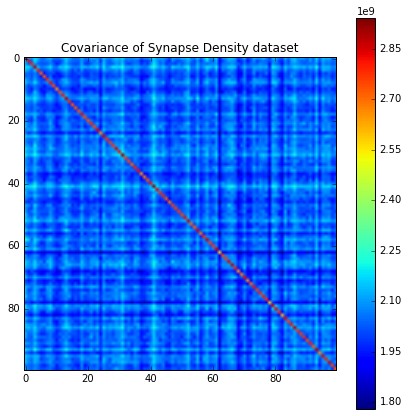

2174.49069853
2147.35198091


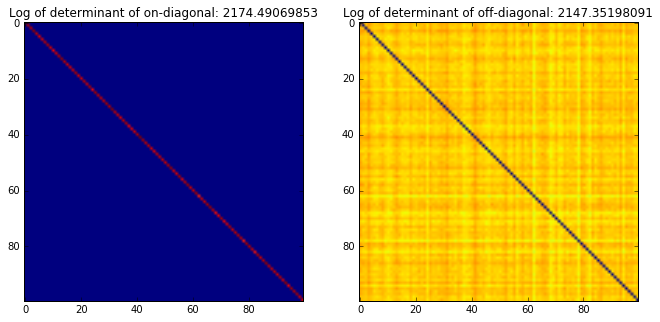

Ratio of the logs of on-diagonal over off-diagonal determinants: 1.01263822506


In [2]:
# Independence Assumption
# since our data set is so large, taking the sample covariance matrix of the entire set and 
# plotting a heat map would give little information, so instead we sample subsets of the data, 
# obtain the covariance matrix, and then investigate the elementwise 
# averaage of all the covariance matrices

sample_size = 100
total_samples = 1000
sample_covariances = np.empty((total_samples, sample_size, sample_size))
for i in range (total_samples):
    # Randomly sample from dataset
    a = np.random.permutation(np.arange(csv.shape[0]))[:sample_size]
    csv_rand_sample = csv[a]
    sample_covariances[i,:,:] = np.cov(csv_rand_sample)

# Average across random samples
covar = np.mean(sample_covariances, axis=0)
print covar.shape

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of Synapse Density dataset')
plt.colorbar()
plt.show()

diag = covar.diagonal()*np.eye(covar.shape[0])
hollow = covar-diag
d_det = np.linalg.slogdet(diag)[1]
h_det = np.linalg.slogdet(hollow)[1]
print d_det
print h_det

plt.figure(figsize=(11,8))
plt.subplot(121)
plt.imshow(diag)
plt.clim([0, np.max(covar)])
plt.title('Log of determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
plt.imshow(hollow)
plt.clim([0, np.max(covar)])
plt.title('Log of determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of the logs of on-diagonal over off-diagonal determinants: " + str(d_det/h_det)

From the above figures and ratio calculation, we see that the majority of variance is coming from the diagonal elements, meaning the data points are likely independent.

# Identical Assumption

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
[ 5185386.8982015   4907607.84298313  4807731.60473209  4783802.51226701
  4773126.49932491  4767377.78645923  4748054.61064377  4745565.38773799
  4741931.44935603  4741275.39492796  4737558.31667317  4583774.83856757
  4576162.84892333  4580508.50478226]


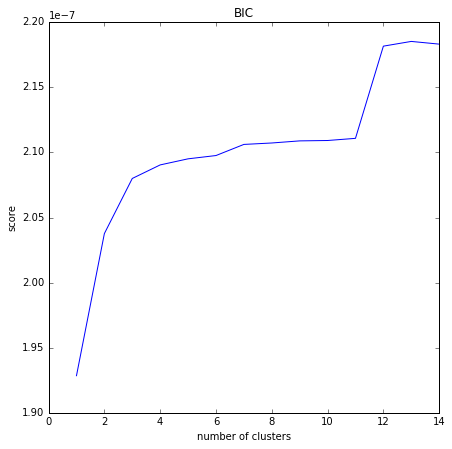

In [3]:
max_clusters = 15
bic = np.array([])
i = np.array(range(1, max_clusters))
for idx in range(1, max_clusters):
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag')
    gmm.fit(csv)
    bic = np.append(bic, gmm.bic(csv))
print bic
plt.figure(figsize=(7,7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()

From the above we observe that, since the elbow of the bic curve lies at 4, our data is likely not identically distributed, meaning our initial assumption was false.

# Conditional Dependence Assumption

Assuming that unmasked is conditioned on position (x,y,z) and number of synapses at that position, our random forest regression performs extremely well with a R^2 value of 0.89 (+/- 0.01). The fact that this regression has a very high R^2 value for our dataset validates the assumption of a relationship between position, number of synapses, and unmasked value.